In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class FocalLossK(nn.Module):
    """https://www.kaggle.com/c/tgs-salt-identification-challenge/discussion/65938"""
    def __init__(self, alpha=0.25, gamma=2, logits=False, reduce=True):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.logits = logits
        self.reduce = reduce

    def forward(self, inputs, targets):
        if self.logits:
            BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        else:
            BCE_loss = F.binary_cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss  # incorrect! alpha

        if self.reduce:
            return torch.mean(F_loss)
        else:
            return F_loss

In [4]:
class FocalLoss(nn.Module):
    """https://github.com/kuangliu/pytorch-retinanet/blob/master/loss.py"""
    def __init__(self,
                 alpha=0.25,
                 gamma=2.0,
                 mult=1.0,
                 logits=True,
                 reduction='mean'):
        super().__init__()
        
        self.alpha = alpha
        self.gamma = gamma
        self.mult = mult
        self.logits = logits
        self.reduction = reduction

    def forward(self, x, y):
        '''Focal loss.
        Args:
          x: (tensor) sized [N,D].
          y: (tensor) sized [N,].
        Return:
          (tensor) focal loss.
        '''
        t = y                                       # 01 encode if not already
        p = torch.sigmoid(x) if self.logits else x  # convert to probabilities
        
        pt = p*t + (1-p)*(1-t)                   # pt=p if t>0 else 1-p
        w = self.alpha*t + (1-self.alpha)*(1-t)  # w=alpha if t>0 else 1-alpha
        w = w * (1-pt).pow(self.gamma)
        if self.logits:
            return self.mult * F.binary_cross_entropy_with_logits(
                x, t, w, reduction=self.reduction)
        else:
            return self.mult * F.binary_cross_entropy(
                x, t, w, reduction=self.reduction)

In [5]:
def f(pt):
    return 1 - pt

In [6]:
def ce(pt):
    return -1 * np.log(pt)

In [7]:
def g(x, alpha, gamma):
    return alpha * (1-x)**gamma

In [8]:
X = np.arange(0.01, 1.00, 0.01)
Y = np.ones_like(X)
Y2 = np.zeros_like(X)

In [38]:
ALPHA, GAMMA, MULT = 0.5, 0.0, 2.0
flk = FocalLossK(alpha=ALPHA, gamma=GAMMA, logits=False, reduce=False)
fl = FocalLoss(alpha=ALPHA, gamma=GAMMA, mult=MULT, logits=False, reduction='none')

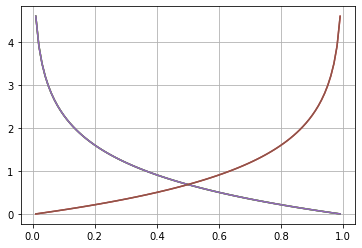

In [39]:
plt.plot(X, ce(X))
plt.plot(X, 2*g(X, alpha=ALPHA, gamma=GAMMA) * ce(X))
plt.plot(X, 2*flk(torch.from_numpy(X), torch.from_numpy(Y)).numpy())
plt.plot(X, 2*flk(torch.from_numpy(X), torch.from_numpy(Y2)).numpy())
plt.plot(X, fl(torch.from_numpy(X), torch.from_numpy(Y)).numpy())
plt.plot(X, fl(torch.from_numpy(X), torch.from_numpy(Y2)).numpy())
plt.grid()
plt.show()

In [11]:
ALPHA = 0.5
GAMMA = 2.0
flk = FocalLossK(alpha=ALPHA, gamma=GAMMA, logits=False, reduce=False)
fl = FocalLoss(alpha=ALPHA, gamma=GAMMA, logits=False, reduction='none')

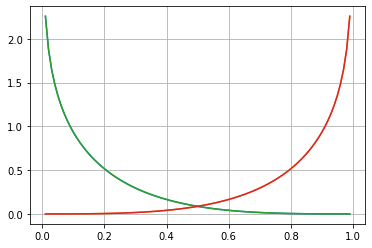

In [12]:
plt.plot(X, flk(torch.from_numpy(X), torch.from_numpy(Y)).numpy())
plt.plot(X, flk(torch.from_numpy(X), torch.from_numpy(Y2)).numpy())
plt.plot(X, fl(torch.from_numpy(X), torch.from_numpy(Y)).numpy())
plt.plot(X, fl(torch.from_numpy(X), torch.from_numpy(Y2)).numpy())
plt.grid()
plt.show()

In [13]:
ALPHA = 0.25
GAMMA = 2.0
flk = FocalLossK(alpha=ALPHA, gamma=GAMMA, logits=False, reduce=False)
fl = FocalLoss(alpha=ALPHA, gamma=GAMMA, logits=False, reduction='none')

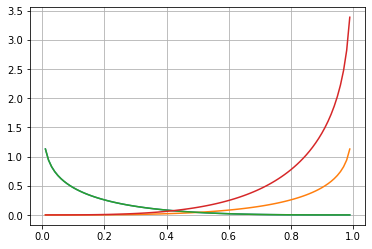

In [14]:
plt.plot(X, flk(torch.from_numpy(X), torch.from_numpy(Y)).numpy())
plt.plot(X, flk(torch.from_numpy(X), torch.from_numpy(Y2)).numpy())
plt.plot(X, fl(torch.from_numpy(X), torch.from_numpy(Y)).numpy())
plt.plot(X, fl(torch.from_numpy(X), torch.from_numpy(Y2)).numpy())
plt.grid()
plt.show()

In [15]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [16]:
X_l = np.arange(-5.0, 5.0, 0.01)
Y_l = np.ones_like(X_l)
Y2_l = np.zeros_like(X_l)

In [17]:
ALPHA = 0.5
GAMMA = 0.0
flk = FocalLossK(alpha=ALPHA, gamma=GAMMA, logits=True, reduce=False)
fl = FocalLoss(alpha=ALPHA, gamma=GAMMA, logits=True, reduction='none')

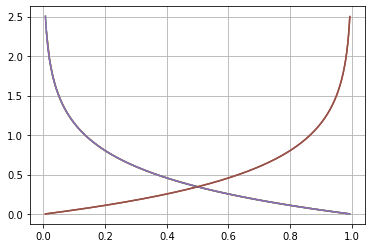

In [18]:
plt.plot(X, ALPHA * ce(X))
plt.plot(X, g(X, alpha=ALPHA, gamma=GAMMA) * ce(X))
plt.plot(sigmoid(X_l), flk(torch.from_numpy(X_l), torch.from_numpy(Y_l)).numpy())
plt.plot(sigmoid(X_l), flk(torch.from_numpy(X_l), torch.from_numpy(Y2_l)).numpy())
plt.plot(sigmoid(X_l), fl(torch.from_numpy(X_l), torch.from_numpy(Y_l)).numpy())
plt.plot(sigmoid(X_l), fl(torch.from_numpy(X_l), torch.from_numpy(Y2_l)).numpy())
plt.grid()
plt.show()

In [19]:
ALPHA = 0.5
GAMMA = 2.0
flk = FocalLossK(alpha=ALPHA, gamma=GAMMA, logits=True, reduce=False)
fl = FocalLoss(alpha=ALPHA, gamma=GAMMA, logits=True, reduction='none')

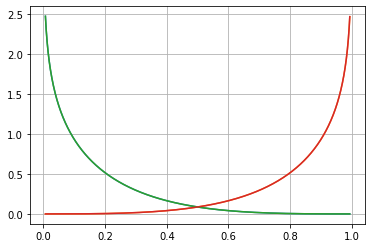

In [20]:
plt.plot(sigmoid(X_l), flk(torch.from_numpy(X_l), torch.from_numpy(Y_l)).numpy())
plt.plot(sigmoid(X_l), flk(torch.from_numpy(X_l), torch.from_numpy(Y2_l)).numpy())
plt.plot(sigmoid(X_l), fl(torch.from_numpy(X_l), torch.from_numpy(Y_l)).numpy())
plt.plot(sigmoid(X_l), fl(torch.from_numpy(X_l), torch.from_numpy(Y2_l)).numpy())
plt.grid()
plt.show()

In [21]:
ALPHA = 0.25
GAMMA = 2.0
flk = FocalLossK(alpha=ALPHA, gamma=GAMMA, logits=True, reduce=False)
fl = FocalLoss(alpha=ALPHA, gamma=GAMMA, logits=True, reduction='none')

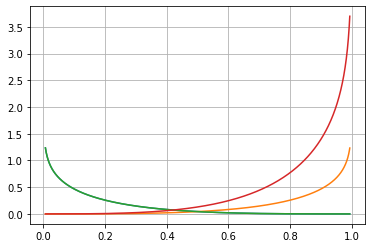

In [22]:
plt.plot(sigmoid(X_l), flk(torch.from_numpy(X_l), torch.from_numpy(Y_l)).numpy())
plt.plot(sigmoid(X_l), flk(torch.from_numpy(X_l), torch.from_numpy(Y2_l)).numpy())
plt.plot(sigmoid(X_l), fl(torch.from_numpy(X_l), torch.from_numpy(Y_l)).numpy())
plt.plot(sigmoid(X_l), fl(torch.from_numpy(X_l), torch.from_numpy(Y2_l)).numpy())
plt.grid()
plt.show()